## Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Donators Difference

- With no_data and company

0     9868562
1    17452720
2    11361743
3     1374847
Name: total_amount, dtype: int64


Text(0.5, 1.0, 'Donators Distribution')

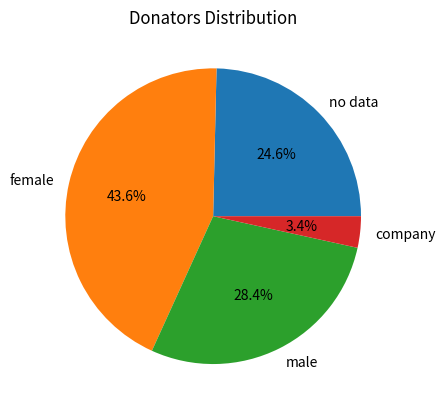

In [11]:
category_data = pd.read_csv('category_amount.csv')
labels = ['no data','female', 'male', 'company']
size = category_data['total_amount']
print (size)
fig, ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%')
ax.set_title("Donators Distribution")




- Without no_data and company

   category  total_amount
0        -1       9868562
1         0      17452720
2         1      11361743
   category  total_amount
1         0      17452720
2         1      11361743


Text(0.5, 1.0, 'Gender Distribution')

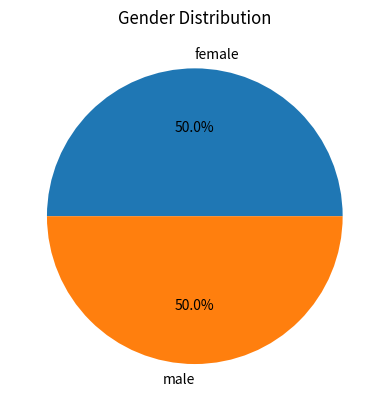

In [12]:
gender_data = category_data.drop(category_data[category_data['category'] == 2].index)
print(gender_data)
gender_data = gender_data.drop(gender_data[gender_data['category'] == -1 ].index)
print (gender_data)


labels = ['female','male']
size = gender_data['category'].value_counts()
fig, ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%')
ax.set_title("Gender Distribution")

### Month Distribution

Text(0.5, 1.0, 'Monthly Donations')

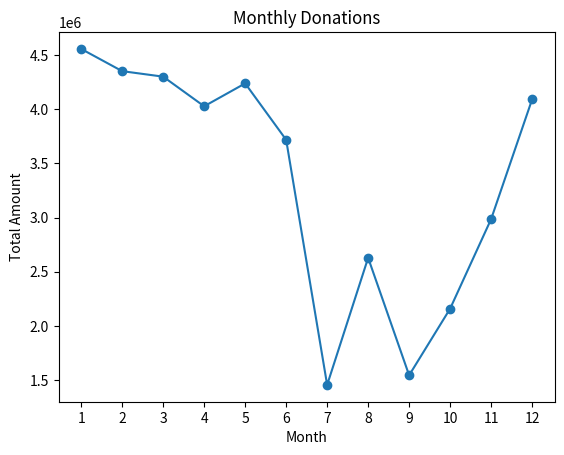

In [13]:
month_data = pd.read_csv('monthly_amount.csv')
plt.plot(month_data['monthly'], month_data['total_amount'],marker = 'o')
plt.xticks(month_data['monthly'])
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Donations')

### City Distribution

- Download font that supports Chinese word. Here we use 'Taipei Sans TC Beta'

Mapping region code to region name

In [14]:
def map_region_code(region):
    if region == 1:
        return '台北市'
    elif region == 3:
        return '台中市'
    elif region == 5:
        return '台南市'
    elif region == 7:
        return '高雄市'
    elif region == 11:
        return '基隆市'
    elif region == 12:
        return '新竹市'
    elif region == 33:
        return '新竹縣'
    elif region == 22:
        return '嘉義市'
    elif region == 40:
        return '嘉義縣'
    elif region == 31:
        return '新北市'
    elif region == 32:
        return '桃園市'
    elif region == 34:
        return '宜蘭縣'
    elif region == 35:
        return '苗栗縣'
    elif region == 37:
        return '彰化縣'
    elif region == 38:
        return '南投縣'
    elif region == 39:
        return '雲林縣'
    elif region == 43:
        return '屏東縣'
    elif region == 44:
        return '澎湖縣'
    elif region == 45:
        return '花蓮縣'
    elif region == 46:
        return '台東縣'
    elif region == 90:
        return '金門縣'
    elif region == 91:
        return '連江縣'
    else:
        return 'Unknown'


**With 'nan'**

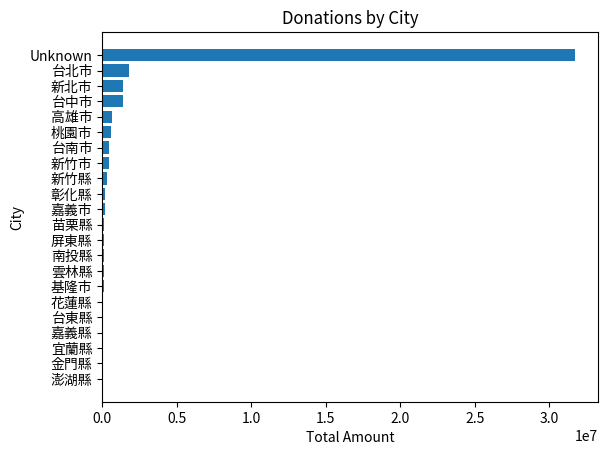

In [15]:
region_data = pd.read_csv('city_amount.csv')
region_data = region_data.sort_values(by = 'total_amount',ascending = True)
x = region_data['total_amount']
y = region_data['city'].astype(int).apply(map_region_code)

plt.rc('font', family='Taipei Sans TC Beta')
plt.barh(y, x)

plt.title('Donations by City')
plt.xlabel('Total Amount')
plt.ylabel('City')
plt.show()

**Without 'nan'**

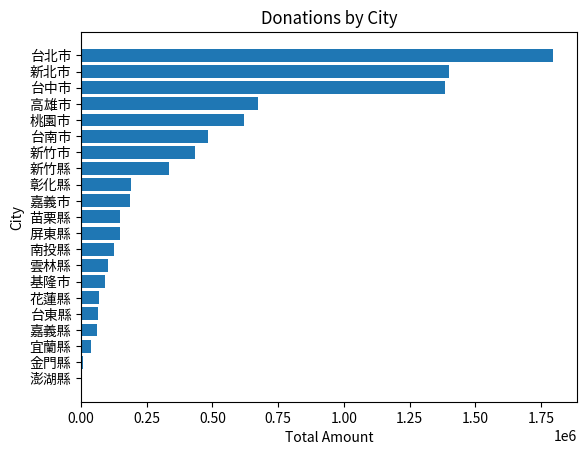

In [16]:
region_data_no_nan = region_data.drop(region_data[region_data['city'] == -1 ].index)
x = region_data_no_nan['total_amount']
y = region_data_no_nan['city'].astype(int).apply(map_region_code)

plt.rc('font', family='Taipei Sans TC Beta')
plt.barh(y, x)
plt.title('Donations by City')
plt.xlabel('Total Amount')
plt.ylabel('City')
plt.show()

### Distribution of donation per person in regions 

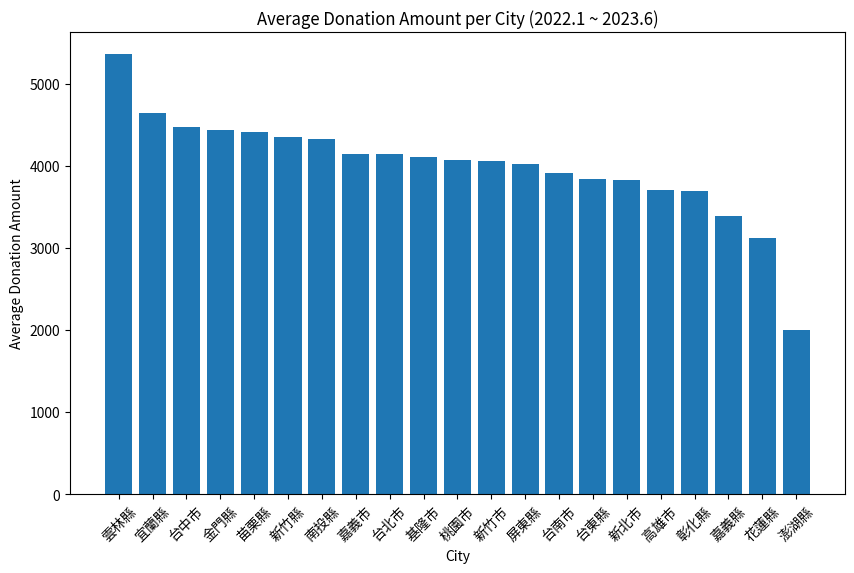

In [17]:
from matplotlib.font_manager import FontProperties
# Load Data
df = pd.read_csv("dataset.csv")

# Calculate the Total Donation Amount for Each Individual
total_donations = df.groupby("donation_id")["amount"].sum()

# Remove Duplicate Donors and Update Total Donation Amounts
unique_donors = df.drop_duplicates(subset="donation_id").copy()
unique_donors.loc[:, "total_amount"] = unique_donors["donation_id"].map(total_donations)
unique_donors = unique_donors.drop(columns=['donater_type', 'category', 'year', 'month', 'tax', 'name', 'amount'])

# Calculate Total Donation Amounts and Number of Donors by Region
grouped_data = unique_donors.groupby("city", as_index=False).agg({"donation_id": "count", "total_amount": "sum"})
grouped_data["average_amount"] = grouped_data["total_amount"] / grouped_data["donation_id"]
grouped_data = grouped_data.sort_values(by="average_amount", ascending=False)

# Convert City Codes to City Names
grouped_data['city'] = grouped_data['city'].astype(int)
def city_type_decoding(description):
    if description == 11:
        return '基隆市'
    elif description == 12:
        return '新竹市'
    elif description == 22:
        return '嘉義市'
    elif description == 31:
        return '新北市'
    elif description == 32:
        return '桃園市'
    elif description == 33:
        return '新竹縣'
    elif description == 34:
        return '宜蘭縣'
    elif description == 35:
        return '苗栗縣'
    elif description == 37:
        return '彰化縣'
    elif description == 38:
        return '南投縣'
    elif description == 39:
        return '雲林縣'
    elif description == 40:
        return '嘉義縣'
    elif description == 43:
        return '屏東縣'
    elif description == 44:
        return '澎湖縣'
    elif description == 45:
        return '花蓮縣'
    elif description == 46:
        return '台東縣'
    elif description == 90:
        return '金門縣'
    elif description == 1:
        return '台北市'
    elif description == 3:
        return '台中市'
    elif description == 5:
        return '台南市'
    elif description == 7:
        return '高雄市'
    else:
        return 'missing'
grouped_data['city_name'] = grouped_data['city'].apply(city_type_decoding)
grouped_data.drop(columns=['city', 'donation_id','total_amount'], inplace = True)

# Plot
chinese_font = FontProperties(family='Taipei Sans TC Beta')
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['city_name'], grouped_data['average_amount'])
plt.title("Average Donation Amount per City (2022.1 ~ 2023.6)")
plt.xlabel("City")
plt.ylabel("Average Donation Amount")
plt.xticks(range(len(grouped_data['city_name'])), grouped_data['city_name'], fontproperties=chinese_font, rotation=45)
plt.show()